In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
df_autoconsumo = pd.read_parquet('df_autoconsumo.parquet')


In [4]:
df_autoconsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_exp              25845 non-null  uint32        
 1   dni                 25332 non-null  Int32         
 2   nif                 513 non-null    Int32         
 3   fecha_alta_exp      25845 non-null  datetime64[ms]
 4   fecha_registro_exp  25845 non-null  datetime64[ms]
 5   municipio           25845 non-null  string        
 6   provincia           25845 non-null  string        
 7   es_telematica       25845 non-null  boolean       
dtypes: Int32(2), boolean(1), datetime64[ms](2), string(2), uint32(1)
memory usage: 1.2 MB


In [13]:
df_autoconsumo['provincia'].unique()

<StringArray>
[           'Ciudad Real',                 'Toledo',            'Guadalajara',
                 'Madrid',               'Albacete',                 'Cuenca',
                'Granada',                 'Murcia',      'Valencia/València',
              'Tarragona',              'Barcelona',              'Cantabria',
                'Navarra',         'Balears, Illes',       'Alicante/Alacant',
                'Bizkaia',     'Castellón/Castelló',                  'Soria',
               'Asturias',            'Palmas, Las',                  'Cádiz',
                 'Teruel',                 'Burgos',                'Córdoba',
                 'Lleida',              'Salamanca',               'Gipuzkoa',
 'Santa Cruz de Tenerife']
Length: 28, dtype: string

In [ ]:
df_autoconsumo['cod_ine_municipio'] = df_autoconsumo['provincia'] df_autoconsumo['municipio']

In [4]:
df_autoconsumo_groupgeo = df_autoconsumo.groupby('municipio').agg(
    total_exp=('id_exp', 'count'),
    total_online=('es_telematica', 'sum'),
    total_presencial=('es_telematica', lambda x: (~x).sum())
).reset_index()

In [5]:
df_autoconsumo_groupgeo.head()

,municipio,total_exp,total_online,total_presencial
0,Abengibre,25,25,0
1,Abenójar,8,8,0
2,Abia de la Obispalía,5,5,0
3,Abánades,4,4,0
4,Agudo,11,11,0


https://opendata.esri.es/datasets/ComunidadSIG::municipios-ign/explore?location=34.900890%2C-6.916698%2C5.53

Nomenclátor Geográfico de Municipios y Entidades de Población
https://datos.gob.es/es/catalogo/e00125901-spaignnomenclatorgeograficomunicipiosentpob201503240000

Límites provincias
https://data.metabolismofcities.org/dashboards/madrid/maps/35492/view/

Límites CCAA
https://data.metabolismofcities.org/library/maps/35475/view/




In [8]:
geojson_path = './mapas/municipios.geojson'
gdf = gpd.read_file(geojson_path)
gdf.columns

Index(['OBJECTID', 'INSPIREID', 'NATCODE', 'NAMEUNIT', 'CODNUT1', 'CODNUT2',
       'CODNUT3', 'CODIGOINE', 'geometry'],
      dtype='object')

In [10]:
gdf['CODNUT1'].unique()

array(['ES4', 'ES1', 'ES3', 'ES6', 'ES5', 'ES2', 'ES7'], dtype=object)

In [11]:
gdf['CODNUT2'].unique()

array(['ES42', 'ES43', 'ES11', 'ES30', 'ES62', 'ES52', 'ES22', 'ES21',
       'ES23', 'ES63', 'ES64', 'ES51', 'ES61', 'ES24', 'ES12', 'ES53',
       'ES13', 'ES41', 'ES70'], dtype=object)

In [19]:
gdf['CODIGOINE'].unique()

array(['16266', '16269', '16270', ..., '38052', '38053', '38901'],
      dtype=object)

In [18]:
gdf['CODIGOINE'].head(30)

0     16266
1     16269
2     16270
3     16271
4     16272
5     16273
6     06056
7     16274
8     16275
9     16276
10    16277
11    15049
12    15050
13    15051
14    15052
15    15053
16    15054
17    16278
18    16279
19    16280
20    15055
21    15056
22    15057
23    15058
24    15059
25    15060
26    15061
27    15062
28    15064
29    16901
Name: CODIGOINE, dtype: object

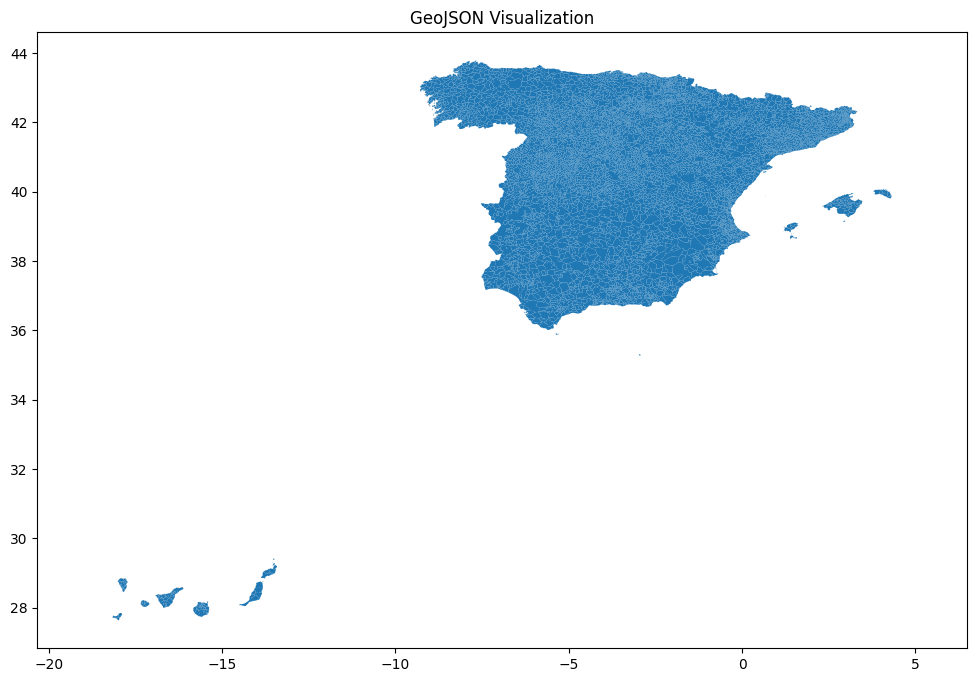

In [7]:

    
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the GeoJSON data
gdf.plot(ax=ax)

# Add title and show
plt.title('GeoJSON Visualization')
plt.axis('equal')
plt.show()